In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from gpax.graphs.functions import FunctionSet

sns.set_theme()

warnings.filterwarnings('ignore')

In [2]:
df_list = []
for problem in ["chemical_2_competition", "friction_dyn_one-hot", "friction_stat_one-hot", "nasa_battery_1_10min",
                "nasa_battery_2_20min", "nikuradse_1", "nikuradse_2", "chemical_1_tower", "flow_stress_phip0.1", ]:
    df_list.append(pd.read_csv(f"genomes_analysis_{problem}.csv"))
genomes_df = pd.concat(df_list, ignore_index=True)
genomes_df["w"] = genomes_df["w"].fillna("no")
genomes_df["w"] = genomes_df["w"].str.replace("_", "", n=1)
genomes_df.loc[genomes_df["w"] == "no", "opt"] = "CGP"
genomes_df.head()

,n_fn_0,n_fn_1,n_fn_2,n_fn_3,n_fn_4,n_fn_5,n_fn_6,n_fn_7,n_fn_8,n_fn_9,...,n_fn_11,used_inputs_fraction,active_fraction,n_one_arity,n_two_arity,run_name,seed,w,opt,problem
0,3.0,2.0,3.0,2.0,2.0,3.0,5.0,1.0,3.0,3.0,...,4.0,0.578947,0.36,26.0,10.0,ga2_chemical_2_competition_adam_wfn_0,0,wfn,adam,chemical_2_competition
1,4.0,3.0,8.0,0.0,2.0,3.0,2.0,2.0,1.0,4.0,...,3.0,0.631579,0.33,18.0,15.0,ga2_chemical_2_competition_adam_win_0,0,win,adam,chemical_2_competition
2,3.0,2.0,3.0,2.0,2.0,3.0,5.0,1.0,3.0,3.0,...,4.0,0.578947,0.36,26.0,10.0,ga2_chemical_2_competition_adam_wfn_bfn_0,0,wfn_bfn,adam,chemical_2_competition
3,4.0,3.0,8.0,0.0,2.0,3.0,2.0,2.0,1.0,4.0,...,3.0,0.631579,0.33,18.0,15.0,ga2_chemical_2_competition_adam_win_bfn_0,0,win_bfn,adam,chemical_2_competition
4,3.0,2.0,3.0,2.0,2.0,3.0,5.0,1.0,3.0,3.0,...,4.0,0.578947,0.36,26.0,10.0,ga2_chemical_2_competition_adam_wfn_bin_0,0,wfn_bin,adam,chemical_2_competition


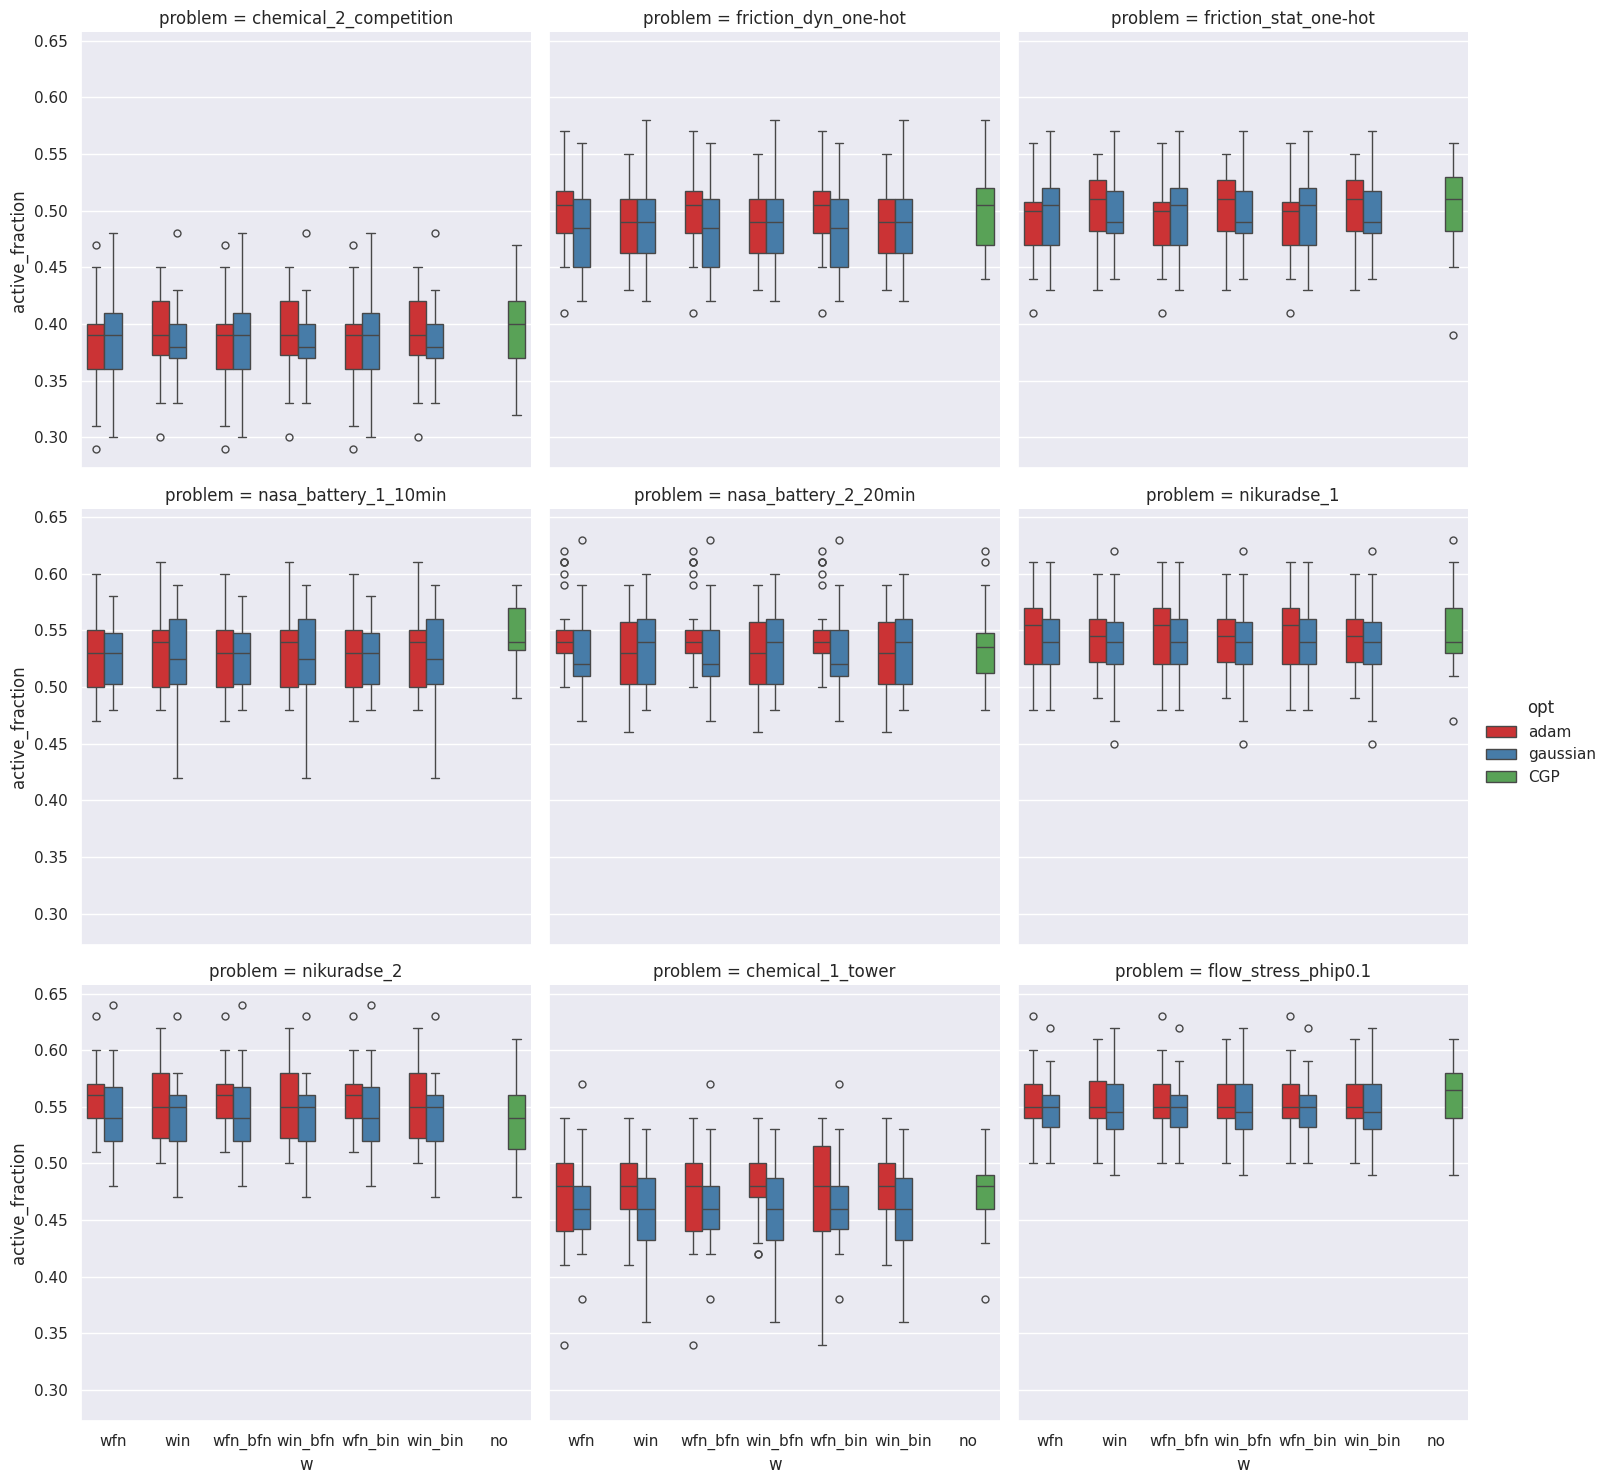

In [10]:
sns.catplot(x="w", y="active_fraction", hue="opt", data=genomes_df, col_wrap=3,  # row="when",
            col="problem", kind="box", palette="Set1")
plt.show()

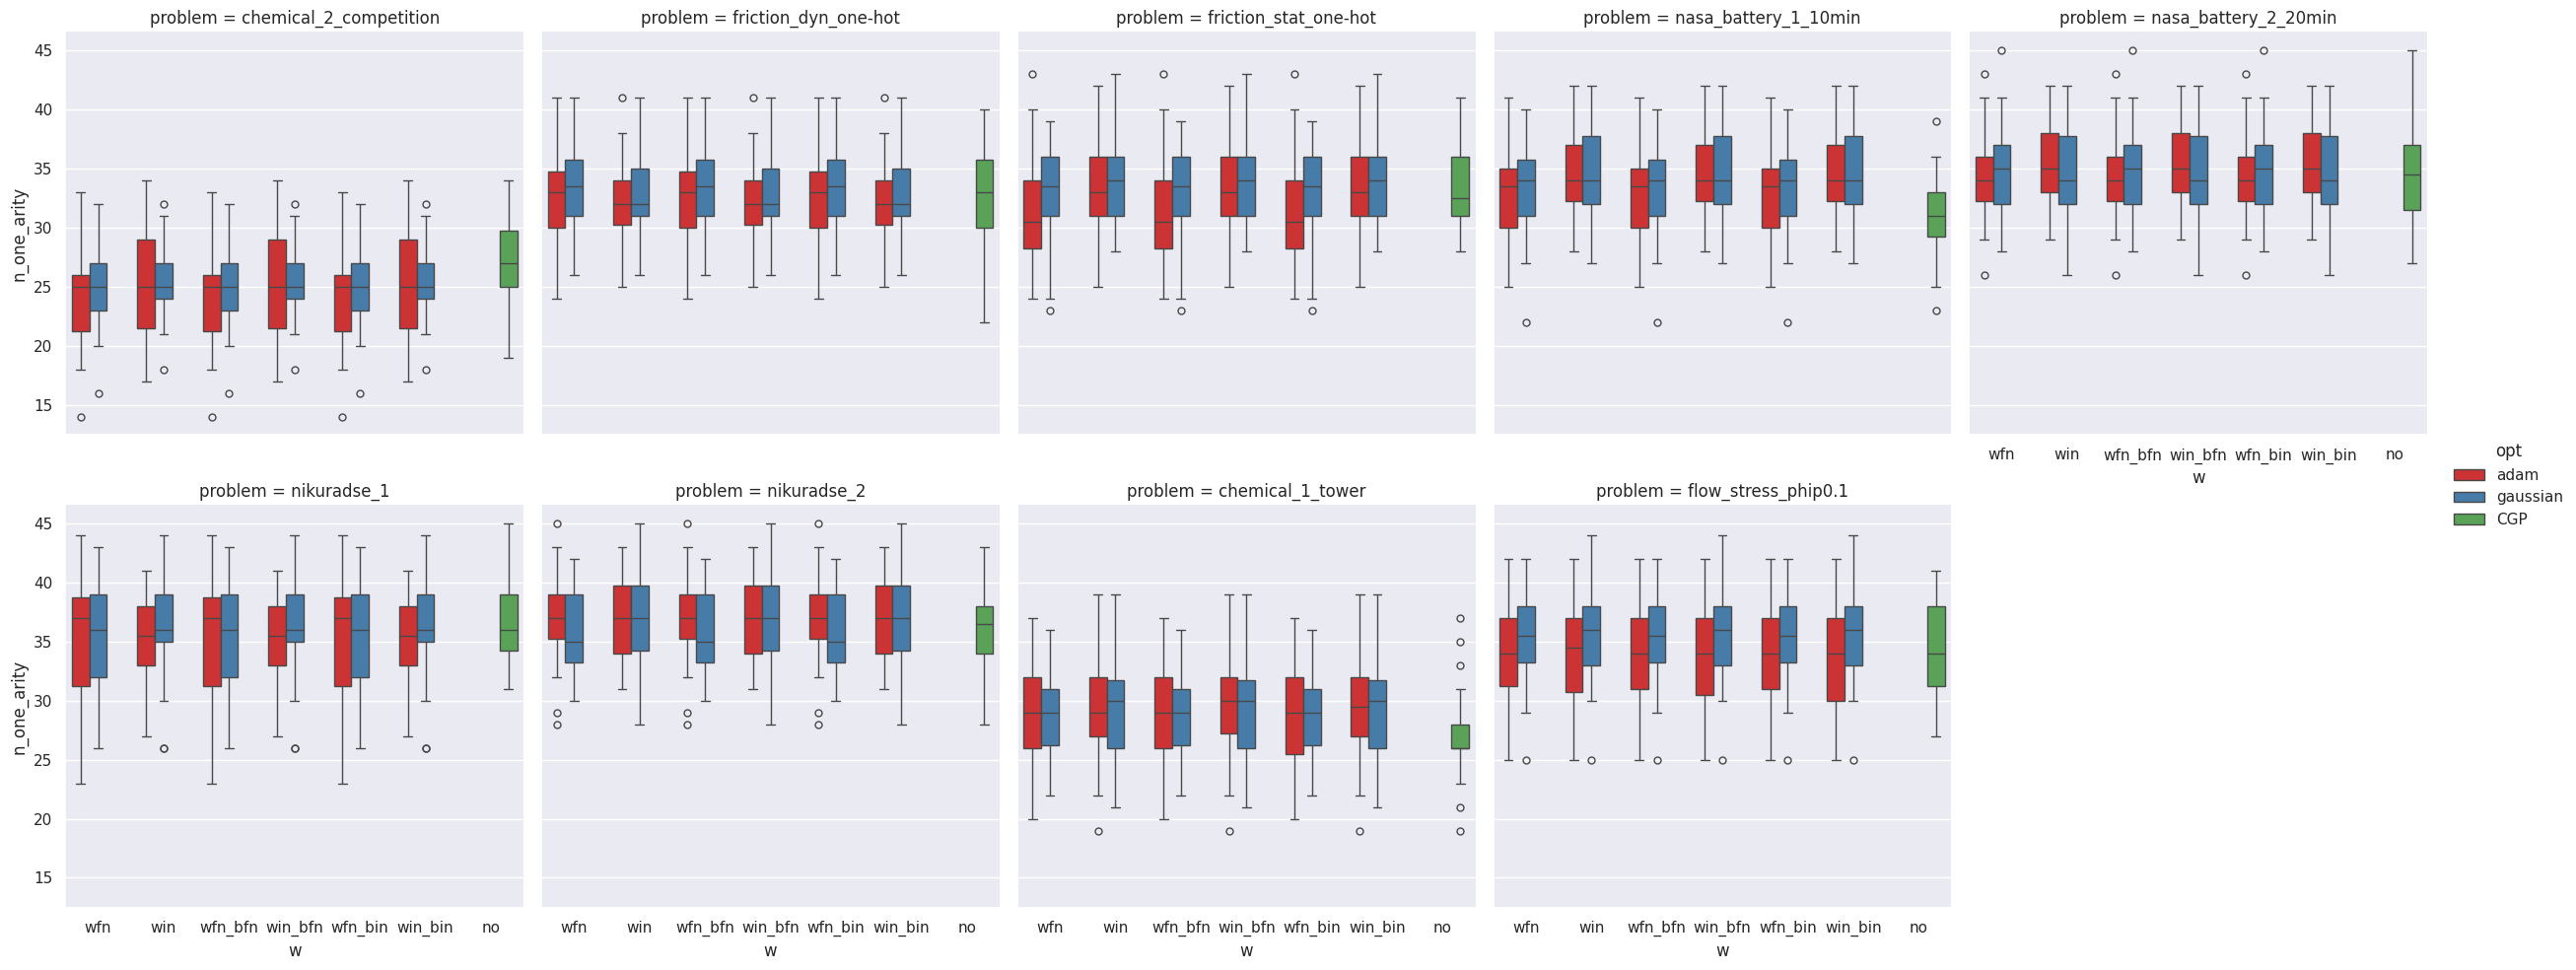

In [4]:
sns.catplot(x="w", y="n_one_arity", hue="opt", data=genomes_df, col_wrap=5,  # row="when",
            col="problem", kind="box", palette="Set1")
plt.show()

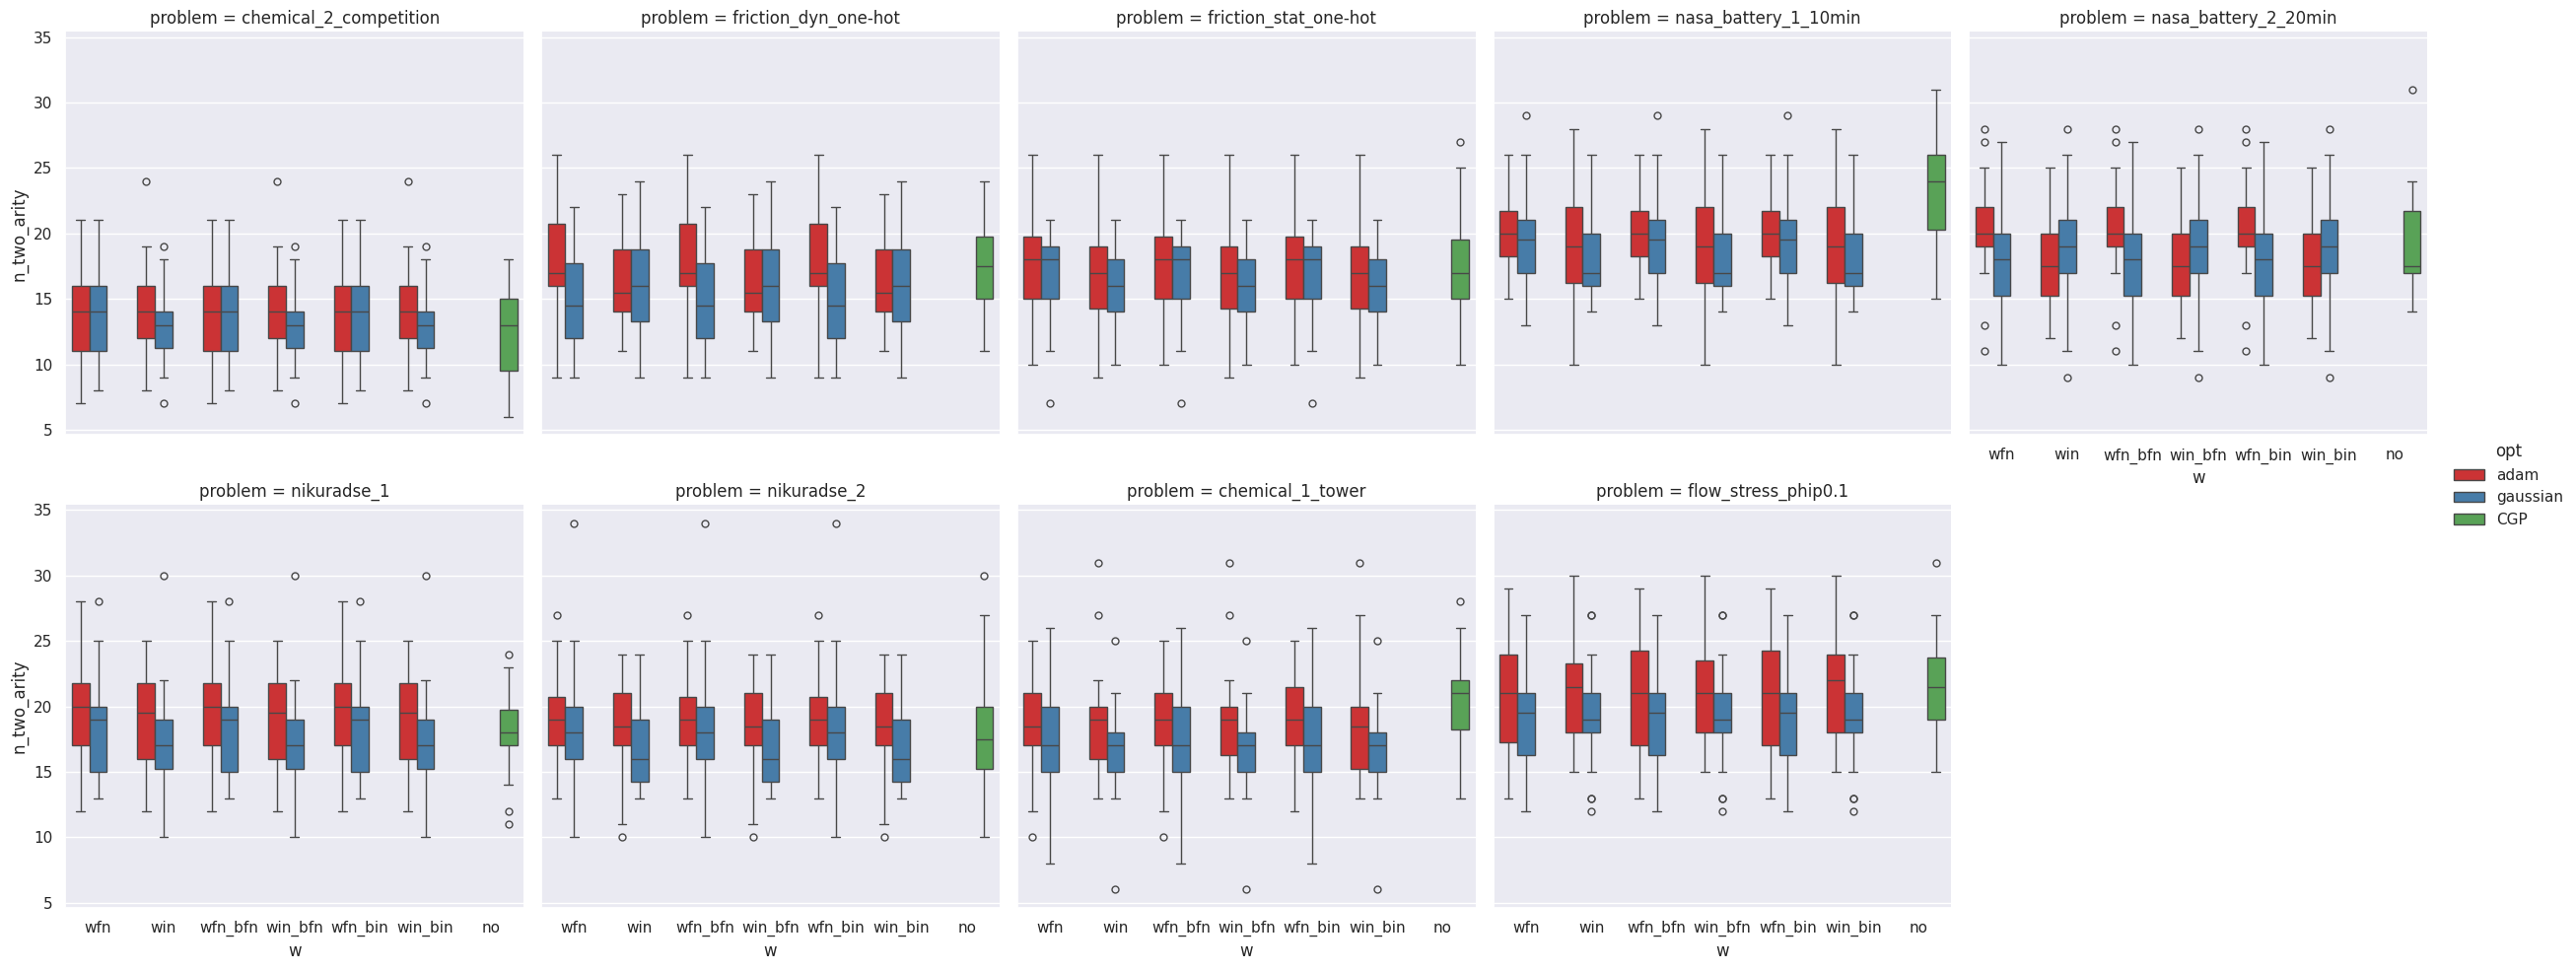

In [5]:
sns.catplot(x="w", y="n_two_arity", hue="opt", data=genomes_df, col_wrap=5,  # row="when",
            col="problem", kind="box", palette="Set1")
plt.show()

In [6]:
radar_df = genomes_df[(genomes_df["problem"] == "nikuradse_1") & (genomes_df["opt"] != "gaussian") & (
    genomes_df["w"].isin(["wfn", "win", "no"]))].dropna()
axis_cols = [f"n_fn_{i}" for i in range(12)]
radar_df = (
    radar_df
    .groupby('w')[axis_cols]
    .mean()
)
radar_df

,n_fn_0,n_fn_1,n_fn_2,n_fn_3,n_fn_4,n_fn_5,n_fn_6,n_fn_7,n_fn_8,n_fn_9,n_fn_10,n_fn_11
w,,,,,,,,,,,,
no,4.566667,5.466667,4.933333,3.333333,4.800000,3.8,5.033333,4.900000,4.666667,4.966667,5.066667,3.500000
wfn,5.366667,4.400000,4.666667,5.133333,4.233333,4.5,4.300000,4.100000,4.733333,4.633333,3.966667,4.866667
win,4.600000,5.000000,4.600000,4.833333,3.866667,4.3,4.233333,4.633333,5.100000,4.666667,4.600000,3.933333


In [7]:
function_set_labels = [
    "plus",
    "minus",
    "times",
    "prot_div",
    "abs",
    "safe_exp",
    "sin",
    "cos",
    "prot_log",
    "sqrt",
    "pow",
    "identity",
]

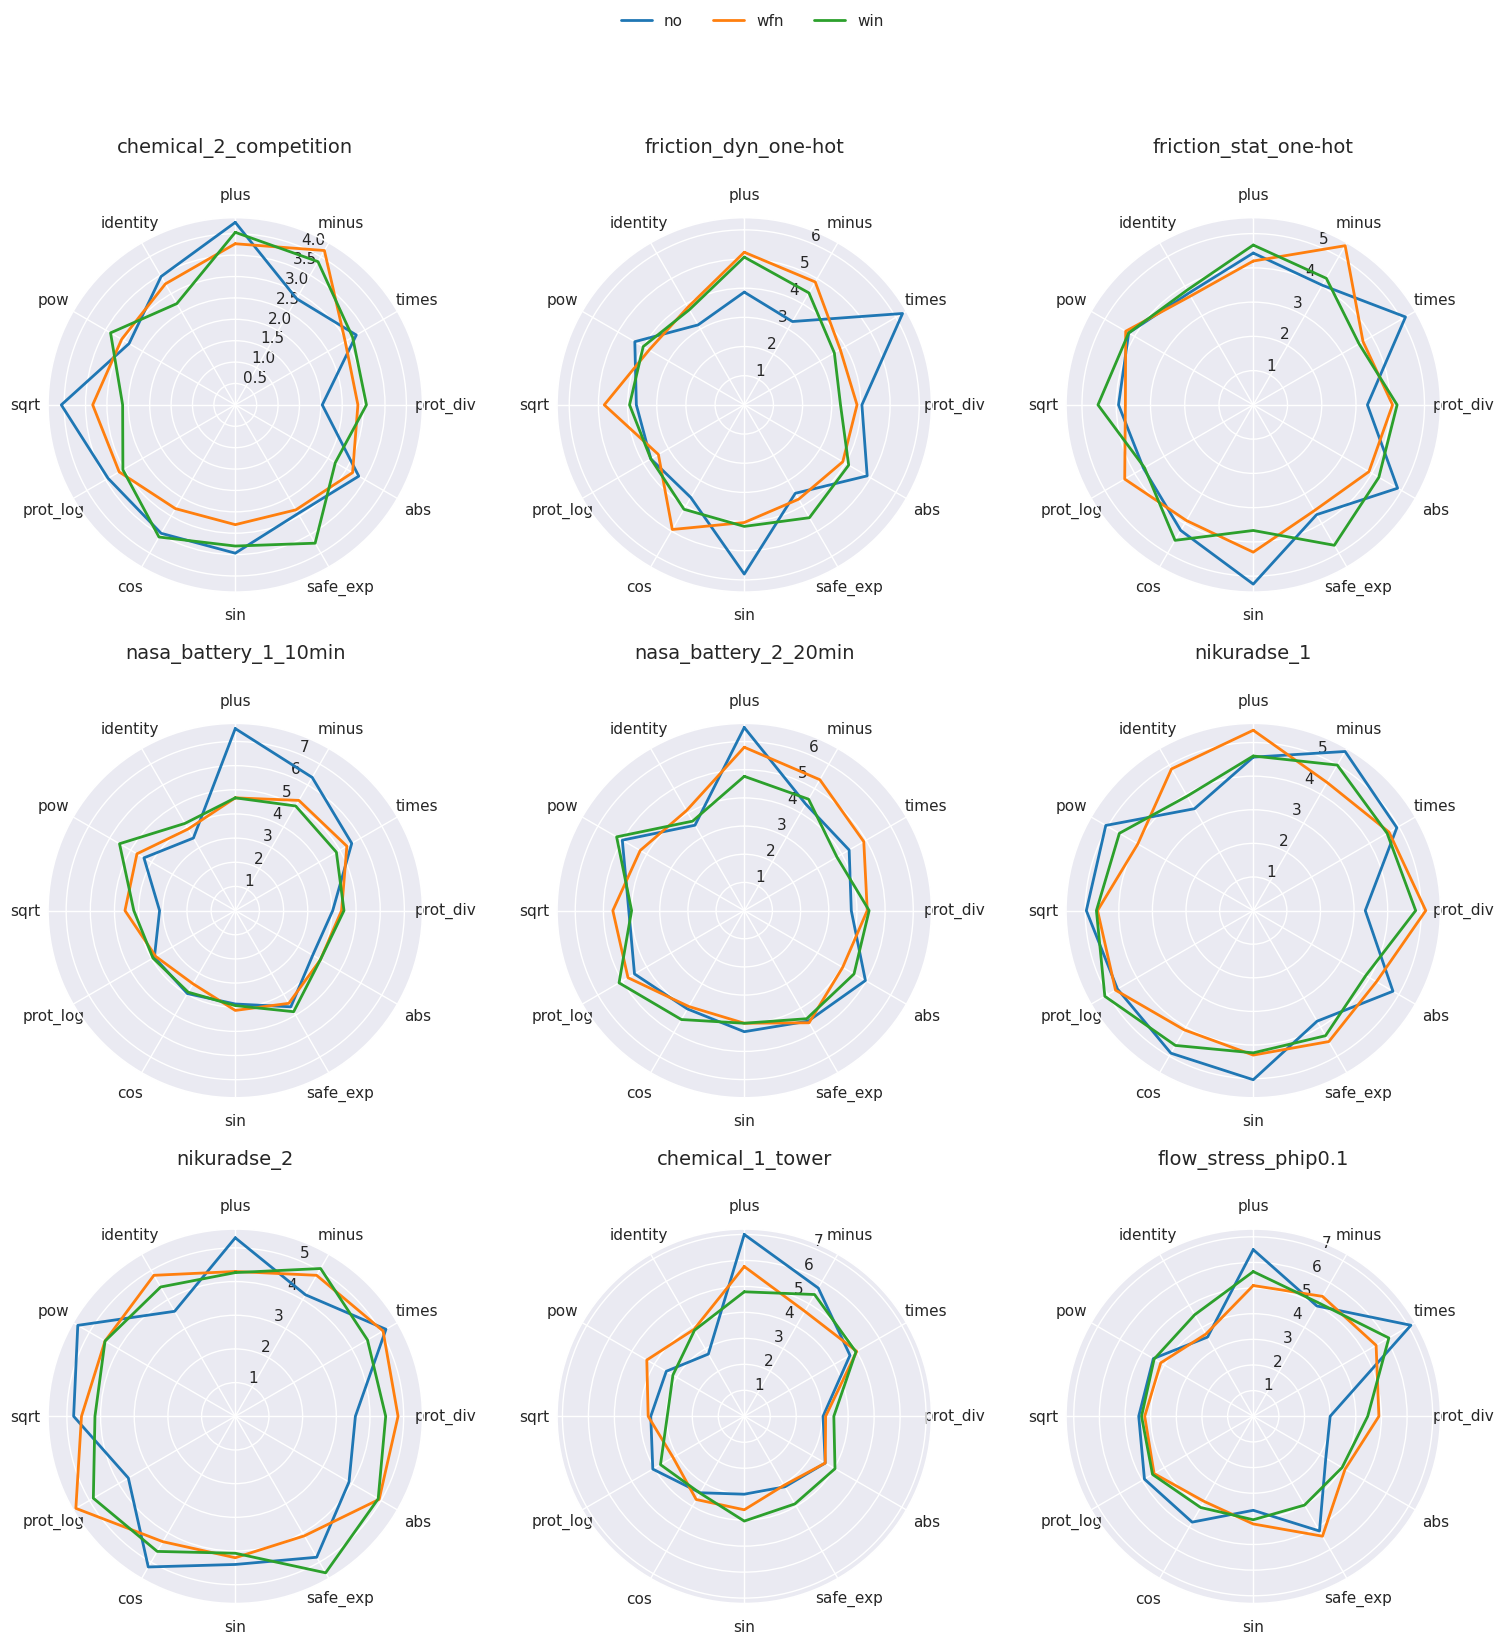

In [9]:
fig, axes = plt.subplots(
    nrows=3,
    ncols=3,
    figsize=(18, 18),
    subplot_kw=dict(polar=True)
)
axis_cols = [f"n_fn_{i}" for i in range(12)]

for ax, problem in zip(axes.flat, genomes_df.problem.unique()):

    radar_df = genomes_df[(genomes_df["problem"] == problem) & (genomes_df["opt"] != "gaussian") & (
        genomes_df["w"].isin(["wfn", "win", "no"]))].dropna()

    radar_df = (
        radar_df
        .groupby('w')[axis_cols]
        .mean()
    )

    for i, (category, row) in enumerate(radar_df.iterrows()):
        vals = row.tolist() + [row.iloc[0]]
        ax.plot(angles, vals, linewidth=2, color=colors[i], label=category)

    ax.set_xticks(np.linspace(0, 2 * np.pi, len(axis_cols), endpoint=False))
    ax.set_xticklabels(function_set_labels)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    ax.set_title(problem, pad=25, fontsize=14)

fig.subplots_adjust(
    wspace=0.35,  # horizontal spacing
    hspace=0.35  # vertical spacing
)
handles, labels = axes.flat[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc="upper center",
    ncol=7,
    frameon=False,
    fontsize=11
)
plt.show()